#Métricas de avaliação supervisionadas



Métricas tem como objetivo avaliar o comportamento do método. Métricas supervisionadas utilizam os rótulos para avaliar o percentual de acerto. Ou seja, utilizam dados já avaliados para verificar se o método está operando corretamente.  Já métricas não-supervisionadas estimam a taxa de acerto do método com base no padrão dos dados.



Exemplo de avaliação supervionada:




<img src="https://github.com/dbguilherme/machinelearning/blob/main/pictures/metrics.png?raw=true"
     alt="Markdown Monster icon"     
     style="margin-right: 50px;"
     width="700px" />


Definindo os nomes:

```
True Positives (TP): casos onde a predição é SIM e o rótulo é SIM

False Positives (FP): casos onde a predição é SIM e o rótulo é NÃO

True Negatives (TN): casos onde a predição é NÃO e o  rótulo é NÃO

False Negatives (FN): casos onde a predição é Não e o  rótulo é SIM
```





# Exemplo

Na imagem abaixo temos 15 pontos divididos por uma linha (simula um classificador). Onde:

    Azul = Positivo
    Vermelho = Negativo

Pontos acima da linha foram classificados como positivos. Pontos abaixo da linha representam a classe negativa.

Observem que alguns pontos então na categoria errada devido a erros de classificação. Vamos calcular o número de acertos:

<figure>
<center >
<img src="https://github.com/dbguilherme/machinelearning/blob/main/pictures/image.png?raw=true"
     width="500px" align="left" />
</figure >


```





    TP: 6
    FP: 2
    TN: 5
    FN: 1



    
```

##Métrica acurácia:

```
Acurácia  = (TP + TN) / TOTAL
```

In [ ]:
Acurácia=(6+5)/15
print(round(Acurácia,2), "%")

0.73 %


**Discussão**: Quando a Acurácia não é efetiva?



## Métrica de Precisão

Computa o número de acertos que o modelo obteve em relação a classe positiva.

```
Precisão= TP / (TP + FP)
```
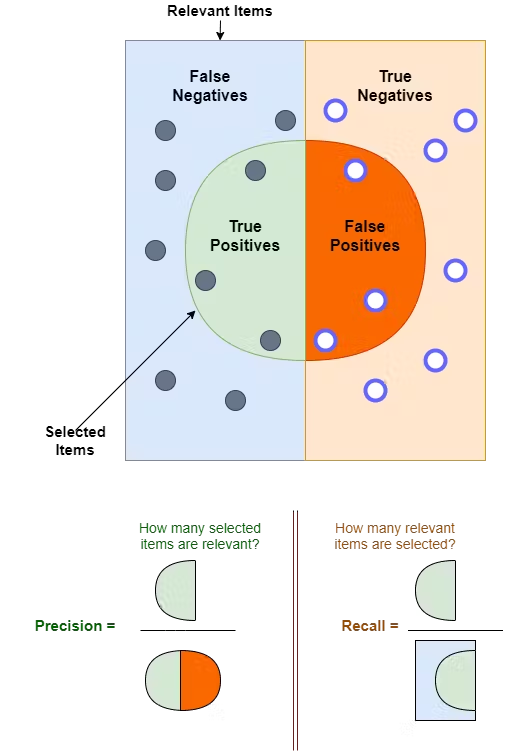

Fonte: https://encord.com/blog/classification-metrics-accuracy-precision-recall/

In [ ]:
P=6/(6+2)
print(P)

0.75


**Pegunta**: Se a Precisão for de 100% significa que meu modelo é ótimo?

##Métrica Recall - Revocação

Em relação ao total de pontos positivos computa o número de acertos.

```
Recall= TP / (TP + FN)
```

In [ ]:
R=6/(6+1)
print(R)

0.8571428571428571


**Pergunta**: se o recall for de 100% o que significa?

## Métrica F1

Junta a Precisão e a revocação em uma única métrica.

```
F1 Score= 2 * Precision * Recall / (Precision + Recall)
```

In [ ]:
F1 = 2 * P * R / (P + R)
print(F1)

0.7999999999999999


##Matrix de confusão:

Detalha o compartamento do método em relação às classe:


|  |  |  | Predição do Método | |
|-| -|-|-|-|
|  |  | | **SIM** | **NÃO** |
|VALOR REAL |  | **SIM** | TP | FN |
|VALOR REAL |  |**NÃO** |  FP | TN |



Exemplo anterior:

|  |  |  | Predição do Método | |
|-| -|-|-|-|
|  |  | | **SIM** | **NÃO** |
| REAL |  | **SIM** | 6 | 1 |
| REAL |  |**NÃO** | 2  | 5 |



#Exemplo usando NB

In [ ]:
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
print ("Features: ", cancer.feature_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print ("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


In [ ]:
print (cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=17)


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

print(y_pred.shape, " ", y_test.shape)

(171,)   (171,)


Precision: 0.9369369369369369
Recall: 0.9454545454545454
F1 0.9411764705882353


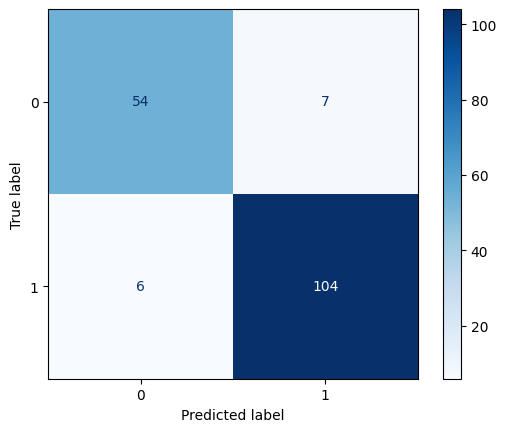

In [ ]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#avaliação, quanto o modelo acertou?
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Tarefas
 1- Em quais casos o modelo errou no exemplo anterior? Apresente exemplos.




R:



 2- Explique em que situações (datasets) a métrica de 'precisão'  e 'revocação' são mais usados que a 'acurácia'

R:

3- Calcule a acurácia, f1 e precisão com os dados abaixo:

Exemplos: 1000
TP: 300
FP: 100
TN: 600
FN: 200


R:

4- Construa a matriz de confusão da questão anterior